# TITLE

K-means clustering analysis 


# NAMES

Names :  Li Xiang, Guanyu Zhou


# ABSTRACT
This report is about k-mean clustering analysis with wine data set. We processed our data and implemented it with the k-means algorithm
that was set with 3 clusters. We also visualize clustered data and unclustered to verify our algorithm. In the end, our
K-means clustering algorithm looking successfully done.

# THEORY

The k-means clustering algorithm is an unsupervised learning algorithm. You will first need to set fixed numbers of k. It refers to a number of centroids. Centroid is the center of a cluster. All data points will be assigned to their cluster by reducing the in-cluster sum of squares. k-Means refers to average data when updating centeriods.

The dataset consists of 13 features and 178 entries.We are using Principal Component Analysis to reduce dimensions of data down to 2 features because it is easier to visualize than multi dimensional data. There are tasks that need to be done step by step. We first imported the required libraries such as NumPy, matplotlib. We imported the dataset and made sure it does not have missing values that needed to be handled. We also visualize unclustered 2 features to check what data points look like. After that, we implemented K-means
from scratch. We are setting our clusters to be 3 and randomly select points as our random centroids and we visualize our centroids on the previous data graph. 
Then we calculate the distance between each point and assign them to the closest centroid. We then visualize 3 clusters. We then keep uppdating centroid
and assign them to the closest centroid until they stop changing which means the maximum iteration is reached and there is no new clusters are being found. 
After that, we visualize our optimal centroids. And we did additional step that we are trying to find optimal K. 

# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'/Users/XiangLi/DataScience-Projects-main/K-Mean Clustering Analysis On Wine Data/wine_data.csv')
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.describe

<bound method NDFrame.describe of      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  

Standardizing the data:

In [5]:
data_standard = (data-np.average(data))/(np.std(data))

Finding covariance of the data matrix:

In [6]:
data_features = data_standard.T
cov_matrix = np.cov(data_features)
cov_matrix[:5]

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317]])

Finding Eigen values and vectors:

In [7]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868])

In [8]:
vectors[:5]

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022]])

In [9]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.3619884809992637, 0.19207490257008927, 0.11123630536249982, 0.07069030182714034, 0.06563293679648619, 0.04935823319222584, 0.04238679322623297, 0.007952148898994559, 0.026807489483788464, 0.012982325756042119, 0.022221534047896962, 0.017368356899899223, 0.019300190939440687]


PCA components:

In [10]:
projected_1 = data_standard.dot(vectors.T[0])
projected_2 = data_standard.dot(vectors.T[1])
data_PCA = pd.DataFrame(projected_1, columns=['PC1'])
data_PCA['PC2'] = projected_2
data_PCA.head()

,PC1,PC2
0,51.055952,-64.178965
1,52.163238,-65.955821
2,51.855963,-64.591277
3,50.615637,-62.866056
4,53.363794,-64.752597


Scatter plot of raw data:

/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

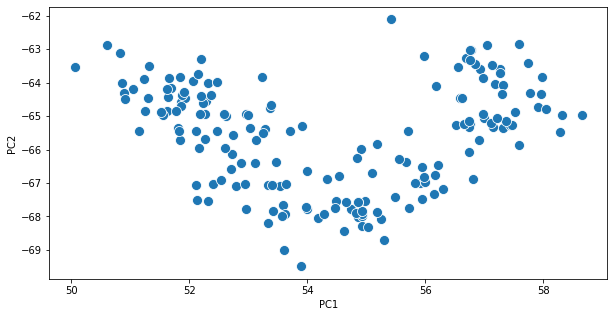

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data_PCA['PC1'], data_PCA['PC2'], s=100)

In [12]:
data_array = data_PCA.values

Calculating Sum of Squares of Error

In [13]:
def sse(data_array, centroids, cluster):
  sum = 0
  for i, pc in enumerate(data_array):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-pc[0])**2 +(centroids[int(cluster[i]), 1]-pc[1])**2)
  return sum

k-means clustering

In [14]:
def k_means_cluster(data_array, k):   #k-number of clusters
  diff = 1
  cluster = np.zeros(data_array.shape[0])
  centroids = data_PCA.sample(n=k).values
  while diff:
     # for each iteration
     for i, pc in enumerate(data_array):
         distance = float('inf')
         # dist of the point from all centroids
         for index, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-pc[0])**2 + (centroid[1]-pc[1])**2)
            # store closest centroid
            if distance > d:
               distance = d
               cluster[i] = index
     new_centroids = pd.DataFrame(data_array).groupby(by=cluster).mean().values
     # If centroids do not change, then break the loop
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:

       centroids = new_centroids
  return centroids, cluster


Finding Optimal k using elbow method

In [15]:
error = []
for k in range(1, 10):
    centroids, cluster = k_means_cluster(data_array, k)
    # Sum of Squares of Error
    err = sse(data_array, centroids, cluster)
    error.append(err)

Plotting Elbow Curve

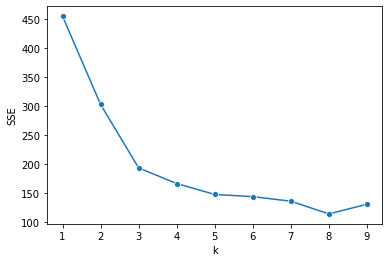

In [16]:
sns.lineplot(x=range(1,10), y=error, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [17]:
for i in range(2,6):
  centroids, cluster = k_means_cluster(data_array, k)

Visualizing clusters for various values of k

/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


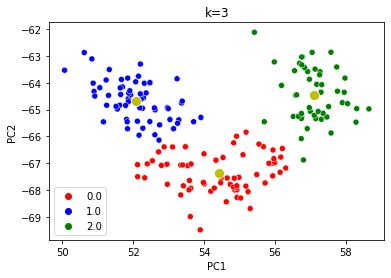

In [18]:
k = 3
centroids, cluster = k_means_cluster(data_array, k)
sns.scatterplot(data_array[:,0], data_array[:, 1], hue=cluster, palette=['r','b','g'])
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k=3')
plt.show()

/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


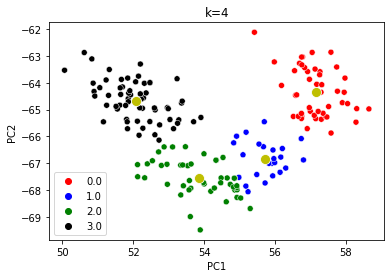

In [19]:
k = 4
centroids, cluster = k_means_cluster(data_array, k)
sns.scatterplot(data_array[:,0], data_array[:, 1], hue=cluster, palette=['r','b','g','black'])
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k=4')
plt.show()

/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


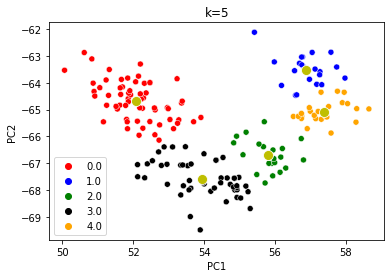

In [20]:
k = 5
centroids, cluster = k_means_cluster(data_array, k)
sns.scatterplot(data_array[:,0], data_array[:, 1], hue=cluster, palette=['r','b','g','black','orange'])
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k=5')
plt.show()

/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/XiangLi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


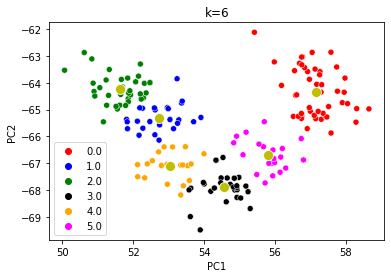

In [21]:
k = 6
centroids, cluster = k_means_cluster(data_array, k)
sns.scatterplot(data_array[:,0], data_array[:, 1], hue=cluster, palette=['r','b','g','black','orange','magenta'])
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k=6')
plt.show()

# ANALYSIS, RESULT AND EXPLANATION:


We first analyze the data that we have. We were curious what data look like so we took a look at the first 5 rows of the data frame. To make data processable, we also check if there are missing values in the data and the result is no missing values. Then We visualize the unclustered data but we can not find clusters from the graph. It is just data points spread on the graph. To make clusters more apparent, we are here implementing the K-means algorithm. But we first need to determine how many clusters that we need. At here we are setting clusters to be 3 by unclustered data points visual inspection. It also means we are selecting three points as our centroids. At this point, we are plotting our 3 random centroids on our unclustered data points map. And then we create a function to calculate the distance between the data points and our three random centroids and assign them to the closest cluster, also we give each of them colors too. After the assignment, we plot them and it's looking good. But we to do more further steps as we need to update centroids to become newly formed clusters. It means again and again, we are calculating the distance between data points and new centroids to assign and form newly clusters until centroids stop changing which means no new clusters have been found. Our iterations have gone through 6 times till it stops. The result is showing three clusters and is more apparent than it was. Additionally, we were wondering what was the best k value for us. Because we don't know how many classes we want, we used the popular Elbow method to see the best K value we should use, and the result showing the point that inertia starts decreasing linearly is between 3-4 It's the same as our first picking K as three.

1. Since there are 13 dimensional features, we converted them into 2 dimensions using principal component analysis. After performing PCA and converting into 2 dimensions, we are left with approximately 56% of original data. 

2. From the Elbow plot between number of clusters(k) and Sum of Squared Error(SSE), we can find that from k=3, the curve starts to flatten.

3. Also for values of k=4,5,6 we plotted and shown the clusters for the given data.

4. Even with 6 clusters, data can be clustered, maybe because data is scattered. But that again determines the computation power and gain of information from the plot.

 5.But really the curve started to flatten after 3 number of clusters.





# Conclusion

For the given dataset, we can cluster the data into 3 optimal number of clusters balancing both computational power and information gain and the optimal number pf clusters is supported by the elbow curve.
